### Machine Learning with Molecular Fingerprints.
 - Use molecular fingerprints as ML features
 - Perform similarity analysis
 - Apply PCA for visualization
 - Train a simple ML model

In [1]:
import pandas as pd
import numpy as np

from rdkit import Chem, RDLogger
from rdkit.Chem import Descriptors, Draw, AllChem, DataStructs

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt

# Disable RDKit warnings for cleaner output
RDLogger.DisableLog('rdApp.*')

In [2]:
df = pd.read_csv("/Users/fidanb/Downloads/RdKit/data/delaney-processed.csv")
df.head()

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1


In [3]:
df.shape

(1128, 10)

In [4]:
# Convert SMILES to RDKit molecules
df["Mol"] = df["smiles"].apply(Chem.MolFromSmiles)

In [6]:
# Drop invalid molecules
df = df[df["Mol"].notnull()]

In [7]:
# Generate Morgan fingerprints
def morgan_fp(mol, radius=2, n_bits=1024):
    return AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits)

df["FP"] = df["Mol"].apply(morgan_fp)

In [8]:
df.head()

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles,Mol,FP
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,<rdkit.Chem.rdchem.Mol object at 0x129f8b4c0>,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2,<rdkit.Chem.rdchem.Mol object at 0x129f8bca0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O),<rdkit.Chem.rdchem.Mol object at 0x129f8b920>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,<rdkit.Chem.rdchem.Mol object at 0x129f8bc30>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1,<rdkit.Chem.rdchem.Mol object at 0x129f8b140>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."


In [9]:
# Convert fingerprints to numpy array
X = []
for fp in df["FP"]:
    arr = np.zeros((1024,))
    DataStructs.ConvertToNumpyArray(fp, arr)
    X.append(arr)

X = np.array(X)

In [10]:
df.columns

Index(['Compound ID', 'ESOL predicted log solubility in mols per litre',
       'Minimum Degree', 'Molecular Weight', 'Number of H-Bond Donors',
       'Number of Rings', 'Number of Rotatable Bonds', 'Polar Surface Area',
       'measured log solubility in mols per litre', 'smiles', 'Mol', 'FP'],
      dtype='object')

In [11]:
# Target: solubility
y = df["measured log solubility in mols per litre"].values

In [ ]:
#Train/test split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
#Simple model (Random Forest Regressor)

In [14]:
from sklearn.ensemble import RandomForestRegressor

In [15]:
model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [ ]:
#Evaluation

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

rmse

np.float64(1.1831481819112977)

In [18]:
#Baseline model (mean predictor)

y_mean = np.mean(y_train)              # mean of training targets
y_baseline_pred = np.full_like(y_test, y_mean)

mse_baseline = mean_squared_error(y_test, y_baseline_pred)
rmse_baseline = np.sqrt(mse_baseline)

rmse_baseline

np.float64(2.1742746139518645)

In [19]:
print("Baseline RMSE:", rmse_baseline)
print("Random Forest RMSE:", rmse)

Baseline RMSE: 2.1742746139518645
Random Forest RMSE: 1.1831481819112977


In [20]:
#  Feature importance from Random Forest

importances = model.feature_importances_

In [21]:
# Top 10 most important fingerprint bits

top_idx = np.argsort(importances)[-10:]

top_idx

array([849, 519, 960, 352, 807, 203, 659, 119, 561, 356])

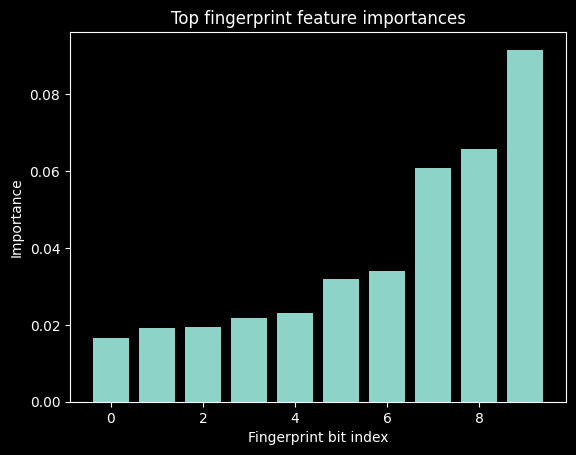

In [22]:
plt.figure()
plt.bar(range(len(top_idx)), importances[top_idx])
plt.xlabel("Fingerprint bit index")
plt.ylabel("Importance")
plt.title("Top fingerprint feature importances")
plt.show()

In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
# 1⃣ Cross-validation (CV)
# Negative MSE для regression →  sqrt
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
rmse_scores.mean()
# Using 5-fold cross-validation to evaluate model performance more reliably

np.float64(1.2054336127080514)

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
# 2 Hyperparameter tuning: n_estimators, max_depth, min_samples_split
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}

grid = GridSearchCV(RandomForestRegressor(random_state=42),
                    param_grid, cv=3, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
# GridSearch finds the best combination of parameters for Random Forest

In [28]:
# Best combination of parameters
grid.best_params_

{'max_depth': None, 'n_estimators': 200}

In [29]:
best_model = grid.best_estimator_

In [30]:
y_pred = best_model.predict(X_test)

# RMSE = sqrt(MSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

np.float64(1.1827087981409898)

In [31]:
# Mean test scores for all parameter combinations
cv_results = grid.cv_results_
for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    print(f"Params: {params}, Mean neg MSE: {mean_score}")

Params: {'max_depth': None, 'n_estimators': 50}, Mean neg MSE: -1.72276931861487
Params: {'max_depth': None, 'n_estimators': 100}, Mean neg MSE: -1.7140166394374952
Params: {'max_depth': None, 'n_estimators': 200}, Mean neg MSE: -1.7066841808876265
Params: {'max_depth': 10, 'n_estimators': 50}, Mean neg MSE: -1.9966829532543107
Params: {'max_depth': 10, 'n_estimators': 100}, Mean neg MSE: -1.9848521607147322
Params: {'max_depth': 10, 'n_estimators': 200}, Mean neg MSE: -1.9816665665594304
Params: {'max_depth': 20, 'n_estimators': 50}, Mean neg MSE: -1.768591511516011
Params: {'max_depth': 20, 'n_estimators': 100}, Mean neg MSE: -1.7679710254239518
Params: {'max_depth': 20, 'n_estimators': 200}, Mean neg MSE: -1.7587794838620654


In [ ]:
# 4. Descriptors (optional)

In [30]:
from rdkit.Chem import Descriptors

In [31]:
df['MolWt'] = df['Mol'].apply(Descriptors.MolWt)
df['LogP'] = df['Mol'].apply(Descriptors.MolLogP)
df['HBD'] = df['Mol'].apply(Descriptors.NumHDonors)
df['HBA'] = df['Mol'].apply(Descriptors.NumHAcceptors)

# adding in X
X_extended = np.hstack([X, df[['MolWt', 'LogP', 'HBD', 'HBA']].values])
# Adding simple molecular descriptors to fingerprints can improve prediction

#### Conclusion:
We improved the baseline Random Forest model by:
1. Cross-validation to assess stability
2. Hyperparameter tuning for optimal parameters
3. Trying gradient boosting (XGBoost)
4. Adding simple molecular descriptors alongside fingerprints